In [1]:
from evaluate_cluster import clustering_eval
import pandas as pd
import os
from sentence_transformers import SentenceTransformer
from ast import literal_eval
from pprint import pprint

df = pd.read_csv(os.path.abspath("benchmark\\andreescu-andrica-problems-on-number-theory\\benchmark_v1.csv"))
df["Problem&Solution"] = df["Problem&Solution"].apply(literal_eval)
df = df.explode(column=["Problem&Solution"]).reset_index().rename(columns={"index": 'label'})
df = df[["label", "Problem&Solution"]].rename(columns={"Problem&Solution": 'text'})

sample_models = 30

c:\Users\mokrota\Documents\GitHub\math_problem_recommender\math_problem_recommender\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
from random import uniform
from pprint import pprint

def test_model(model):
    thresholds = [uniform(0.0, 1.0) for _ in range(sample_models)]
    best_score = None
    best_threshold = None
    best_clusters = None
    best_fig = None
    best_metrics_d = None
    for threshold in thresholds:
        clusters, fig, metrics_d = clustering_eval(df, model, min_community_size=1, threshold=threshold, log=False)
        m = metrics_d['adjusted random score']
        if not best_score or m > best_score:
            best_clusters = clusters
            best_fig = fig
            best_metrics_d = metrics_d
            best_score = m
            best_threshold = threshold
    pprint(f"Best Threshold: {best_threshold};\nBest scores: {best_metrics_d};\nBest clusters: {best_clusters}")
    best_fig.show()

    return best_clusters, best_fig, best_metrics_d, best_threshold

## Baseline (out of the box model)

In [3]:
model = SentenceTransformer("all-MiniLM-L6-v2")
test_model(model)

Batches: 100%|██████████| 7/7 [00:00<00:00, 17.69it/s]


('Best Threshold: 0.5541578727887644;\n'
 "Best scores: {'random score': 0.9437673772011121, 'adjusted random score': "
 '0.08877528493735985};\n'
 'Best clusters: [[61, 273, 366, 275, 143, 199, 367, 276, 255, 285, 263, 286, '
 '409, 284, 104, 340, 407, 281, 4, 271, 365, 280, 158, 371, 288, 3, 372, 153, '
 '303, 277, 268, 203, 134, 269, 150, 202, 218, 412, 289, 359, 411, 201, 362, '
 '154, 6, 262], [152, 157, 386, 381, 385, 337, 83, 62, 43, 390, 243, 58, 394, '
 '389, 80, 387, 98, 204, 179, 64, 301, 210, 344, 84, 341, 170, 383, 264, 168, '
 '107, 85, 376, 258, 396, 183, 75, 146, 54, 52, 388, 177, 135, 351, 265, 39], '
 '[324, 68, 338, 326, 327, 333, 66, 163, 181, 313, 342, 156, 174, 312, 302, '
 '79, 178, 78, 71, 172, 320, 311, 319, 325, 382], [228, 125, 96, 105, 225, '
 '119, 219, 148, 214, 120, 128, 50, 212, 287, 47, 94, 48, 161, 216, 330, 377], '
 '[328, 334, 197, 240, 251, 309, 404, 346, 221, 310, 136, 317, 323, 106, 147, '
 '335, 252], [130, 405, 398, 391, 395, 49, 384, 220, 399, 

([[61,
   273,
   366,
   275,
   143,
   199,
   367,
   276,
   255,
   285,
   263,
   286,
   409,
   284,
   104,
   340,
   407,
   281,
   4,
   271,
   365,
   280,
   158,
   371,
   288,
   3,
   372,
   153,
   303,
   277,
   268,
   203,
   134,
   269,
   150,
   202,
   218,
   412,
   289,
   359,
   411,
   201,
   362,
   154,
   6,
   262],
  [152,
   157,
   386,
   381,
   385,
   337,
   83,
   62,
   43,
   390,
   243,
   58,
   394,
   389,
   80,
   387,
   98,
   204,
   179,
   64,
   301,
   210,
   344,
   84,
   341,
   170,
   383,
   264,
   168,
   107,
   85,
   376,
   258,
   396,
   183,
   75,
   146,
   54,
   52,
   388,
   177,
   135,
   351,
   265,
   39],
  [324,
   68,
   338,
   326,
   327,
   333,
   66,
   163,
   181,
   313,
   342,
   156,
   174,
   312,
   302,
   79,
   178,
   78,
   71,
   172,
   320,
   311,
   319,
   325,
   382],
  [228,
   125,
   96,
   105,
   225,
   119,
   219,
   148,
   214,
   120,
   128,
   50,


# Unsupervised methods

## Trained with TSDAE

In [4]:
model = SentenceTransformer("models/tsdae-model")
test_model(model)

You try to use a model that was created with version 4.1.0, however, your version is 3.2.1. This might cause unexpected behavior or errors. In that case, try to update to the latest version.



Batches: 100%|██████████| 7/7 [00:00<00:00, 16.90it/s]


('Best Threshold: 0.9700760491081921;\n'
 "Best scores: {'random score': 0.30583873957367935, 'adjusted random score': "
 '0.0006858571860166991};\n'
 'Best clusters: [[98, 103, 161, 75, 150, 364, 118, 71, 344, 407, 326, 282, '
 '160, 84, 154, 415, 68, 412, 144, 122, 255, 338, 217, 319, 333, 102, 26, 182, '
 '312, 377, 52, 187, 27, 337, 327, 142, 299, 111, 371, 179, 204, 390, 287, '
 '153, 402, 169, 260, 119, 384, 149, 303, 269, 85, 355, 357, 170, 128, 86, '
 '209, 311, 277, 107, 105, 155, 346, 127, 254, 125, 365, 341, 221, 267, 218, '
 '115, 351, 362, 177, 321, 28, 185, 313, 353, 152, 214, 173, 352, 325, 136, '
 '379, 278, 205, 411, 305, 112, 317, 283, 323, 320, 99, 272, 387, 124, 37, '
 '340, 199, 172, 190, 367, 178, 176, 252, 297, 163, 280, 134, 335, 46, 6, 147, '
 '116, 74, 329, 258, 181, 145, 372, 83, 70, 183, 66, 410, 386, 141, 109, 93, '
 '328, 164, 381, 29, 165, 94, 251, 114, 334, 53, 48, 392, 1, 291, 294, 373, '
 '55, 162, 314, 62, 133, 130, 15, 186, 257, 45, 219, 175, 227, 33

([[98,
   103,
   161,
   75,
   150,
   364,
   118,
   71,
   344,
   407,
   326,
   282,
   160,
   84,
   154,
   415,
   68,
   412,
   144,
   122,
   255,
   338,
   217,
   319,
   333,
   102,
   26,
   182,
   312,
   377,
   52,
   187,
   27,
   337,
   327,
   142,
   299,
   111,
   371,
   179,
   204,
   390,
   287,
   153,
   402,
   169,
   260,
   119,
   384,
   149,
   303,
   269,
   85,
   355,
   357,
   170,
   128,
   86,
   209,
   311,
   277,
   107,
   105,
   155,
   346,
   127,
   254,
   125,
   365,
   341,
   221,
   267,
   218,
   115,
   351,
   362,
   177,
   321,
   28,
   185,
   313,
   353,
   152,
   214,
   173,
   352,
   325,
   136,
   379,
   278,
   205,
   411,
   305,
   112,
   317,
   283,
   323,
   320,
   99,
   272,
   387,
   124,
   37,
   340,
   199,
   172,
   190,
   367,
   178,
   176,
   252,
   297,
   163,
   280,
   134,
   335,
   46,
   6,
   147,
   116,
   74,
   329,
   258,
   181,
   145,
   372,
   83,
  

## Trained with SimCSE

In [5]:
model = SentenceTransformer("models/simcse-model")
test_model(model)

You try to use a model that was created with version 4.1.0, however, your version is 3.2.1. This might cause unexpected behavior or errors. In that case, try to update to the latest version.



Batches: 100%|██████████| 7/7 [00:00<00:00, 15.76it/s]


('Best Threshold: 0.9885195787265367;\n'
 "Best scores: {'random score': 0.4067075996292864, 'adjusted random score': "
 '0.004150057551833144};\n'
 'Best clusters: [[378, 9, 49, 415, 355, 286, 404, 408, 279, 184, 271, 261, '
 '410, 277, 43, 10, 107, 365, 61, 158, 47, 360, 325, 46, 403, 205, 362, 44, '
 '391, 85, 18, 380, 48, 352, 133, 4, 399, 255, 56, 152, 218, 357, 361, 293, '
 '372, 280, 38, 195, 111, 346, 252, 386, 348, 177, 246, 363, 136, 171, 366, '
 '388, 212, 359, 226, 263, 295, 318, 266, 242, 155, 395, 256, 267, 314, 259, '
 '15, 412, 24, 60, 209, 220, 273, 245, 0, 257, 236, 1, 13, 189, 197, 340, 131, '
 '42, 203, 270, 188, 153, 405, 150, 7, 21, 162, 202, 345, 258, 5, 320, 398, '
 '210, 33, 297, 160, 241, 301, 161, 151, 282, 55, 28, 159, 303, 272, 354, 294, '
 '409, 296, 292, 200, 230, 169, 149, 278, 382, 290, 214, 141, 232, 104, 198, '
 '276, 298, 106, 251, 396, 387, 2, 414, 11, 274, 344, 199, 240, 103, 217, 229, '
 '371, 14, 41, 351, 187, 323, 356, 102, 134, 268, 353, 97, 30

([[378,
   9,
   49,
   415,
   355,
   286,
   404,
   408,
   279,
   184,
   271,
   261,
   410,
   277,
   43,
   10,
   107,
   365,
   61,
   158,
   47,
   360,
   325,
   46,
   403,
   205,
   362,
   44,
   391,
   85,
   18,
   380,
   48,
   352,
   133,
   4,
   399,
   255,
   56,
   152,
   218,
   357,
   361,
   293,
   372,
   280,
   38,
   195,
   111,
   346,
   252,
   386,
   348,
   177,
   246,
   363,
   136,
   171,
   366,
   388,
   212,
   359,
   226,
   263,
   295,
   318,
   266,
   242,
   155,
   395,
   256,
   267,
   314,
   259,
   15,
   412,
   24,
   60,
   209,
   220,
   273,
   245,
   0,
   257,
   236,
   1,
   13,
   189,
   197,
   340,
   131,
   42,
   203,
   270,
   188,
   153,
   405,
   150,
   7,
   21,
   162,
   202,
   345,
   258,
   5,
   320,
   398,
   210,
   33,
   297,
   160,
   241,
   301,
   161,
   151,
   282,
   55,
   28,
   159,
   303,
   272,
   354,
   294,
   409,
   296,
   292,
   200,
   230,
   169,
 

Apparently all unsupervised methods perform poorly because of domain specific words and symbols.

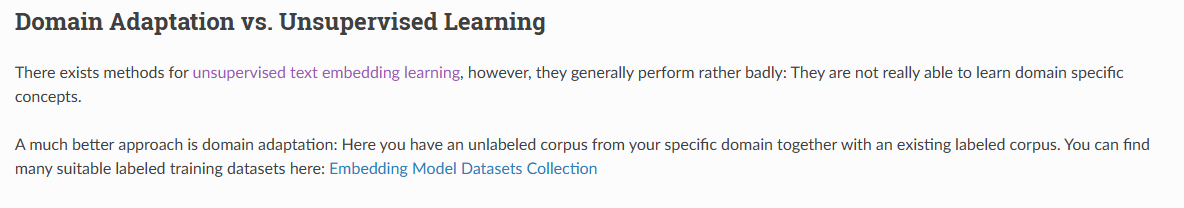